<center><img src="https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/nb_bg.png"/></center>


## 1. Data Preparation

### 1.1 Standard imports and load datasets

In [ ]:
pip install pmdarima==1.8.2

     |████████████████████████████████| 1.5 MB 4.1 MB/s 
     |████████████████████████████████| 14.8 MB 55.8 MB/s 
     |████████████████████████████████| 9.8 MB 23.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
path='https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/Daily%2030%20years.csv'
data = pd.read_csv(path, sep=';' , parse_dates = ['date'], index_col = ['date'])
data.head()

,tavg,tmin,tmax,prcp
date,,,,
1990-01-01,11.6,6.6,17.0,0.0
1990-02-01,12.8,6.9,NaN,0.5
1990-03-01,10.7,NaN,12.9,4.1
1990-04-01,9.8,6.2,14.2,13.0
1990-05-01,10.3,NaN,15.4,1.0


✔ tavg : Température moyenne <br>
✔ tmin : Température min<br>
✔ tmax : Température max<br>
✔ prcp : quantités précipétations en mm<br>

In [ ]:
data.shape

(11324, 4)

✔ Notre Dataset contient quatre colonne et 11324 observations

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tavg,11260.0,16.753375,5.013852,2.6,12.6,16.6,20.9,35.9
tmin,8469.0,11.091676,5.356203,-4.6,6.9,11.2,15.8,28.2
tmax,8516.0,23.197511,5.729353,9.1,18.6,23.0,27.1,46.3
prcp,7775.0,1.100810,5.448090,0.0,0.0,0.0,0.0,270.0


On va supprimmer les deux colonnes tmin et tmax car on'en aura pas besoin

In [ ]:
data=data.drop(['tmax','tmin'], axis=1)
data.isna().sum()

tavg      64
prcp    3549
dtype: int64

### 1.2 les valeures manquantes

✔ Il y'a des valeurs manquantes, 31% des données de la colonne précipétations sont manquantes. <br>
✔ On va  remplisser ces valeurs manquantes de températures par interpolation linéaire.
<br> ✔ la formule d'interpolation est :<br> 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/4953daa93f7583973d7ae5716f53873f96b42afb'/>

In [ ]:
data['prcp'] = data['prcp'].fillna(0)
data.isna().sum()

tavg    64
prcp     0
dtype: int64

In [ ]:
data['prcp'] = data['prcp'].fillna(0)
data.isna().sum()

tavg    64
prcp     0
dtype: int64

### 1.3 rééchantillonnage

#####          Données mensuelles

In [ ]:
monthlyData=pd.DataFrame()
monthlyData['prcp']=data['prcp'].resample('M').sum()
monthlyData['tavg']=data['tavg'].resample('M').mean()
monthlyData.drop(monthlyData.tail(1).index,inplace=True)
monthlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    372 non-null    float64
 1   tavg    372 non-null    float64
dtypes: float64(2)
memory usage: 8.7 KB


#####          Données annuelles

In [ ]:
yearlyData=pd.DataFrame()
yearlyData['prcp']=monthlyData['prcp'].resample('Y').sum()
yearlyData['tavg']=monthlyData['tavg'].resample('Y').mean()
yearlyData.drop(yearlyData.tail(1).index,inplace=True)
yearlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1990-12-31 to 2019-12-31
Freq: A-DEC
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    30 non-null     float64
 1   tavg    30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


####   Ploting

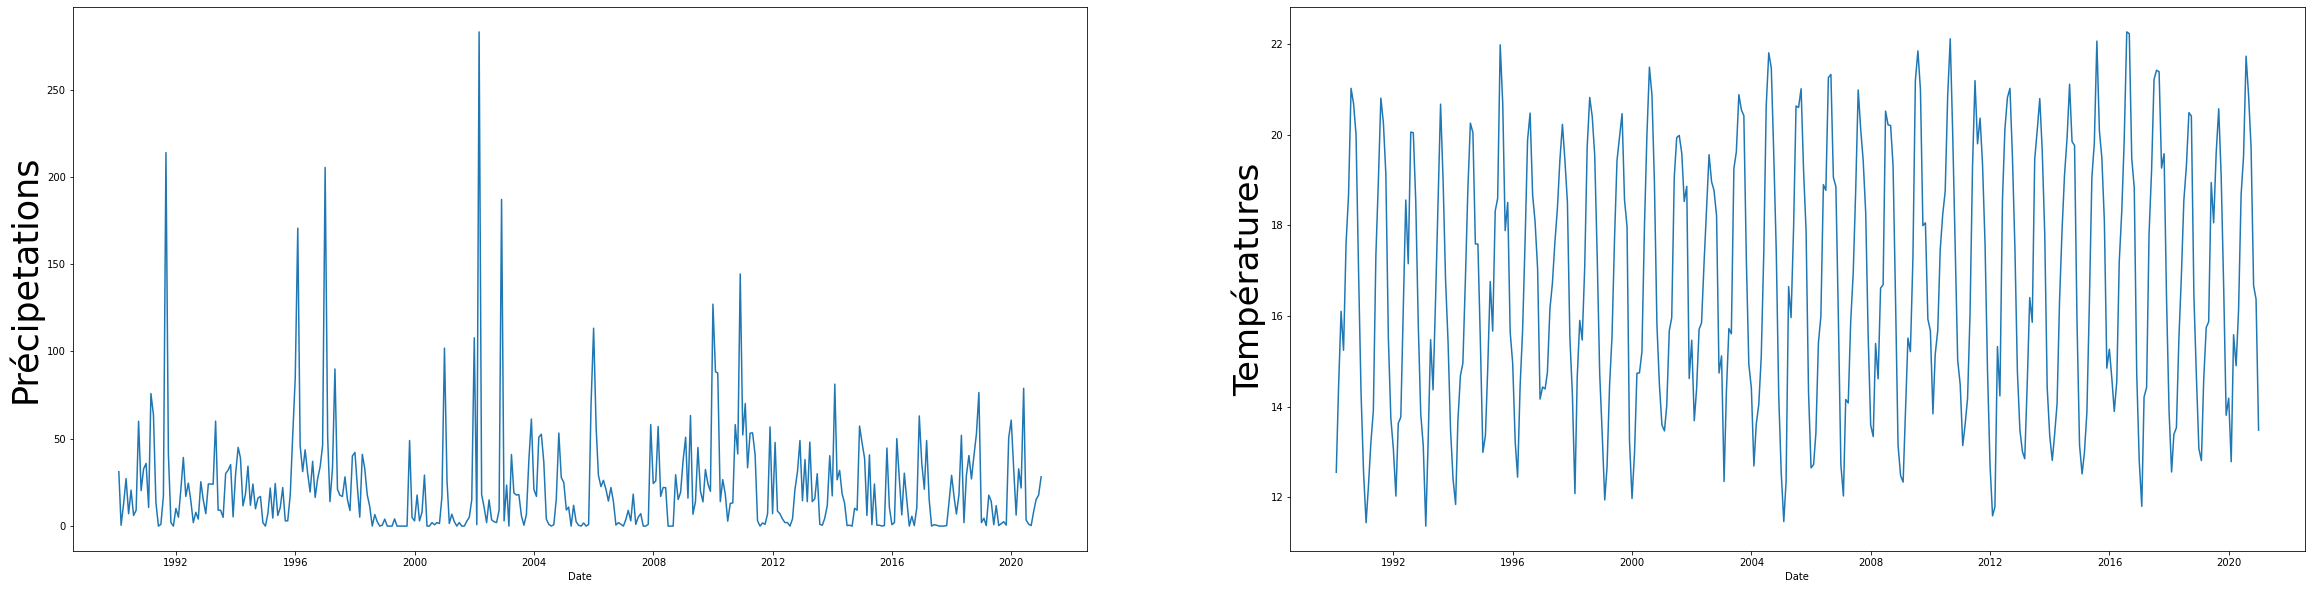

In [ ]:
fig, ax = plt.subplots(figsize=(40, 10))

plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=35)
plt.plot(monthlyData[['prcp']])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Températures',fontsize=34)
plt.plot(monthlyData[['tavg']])

plt.show()

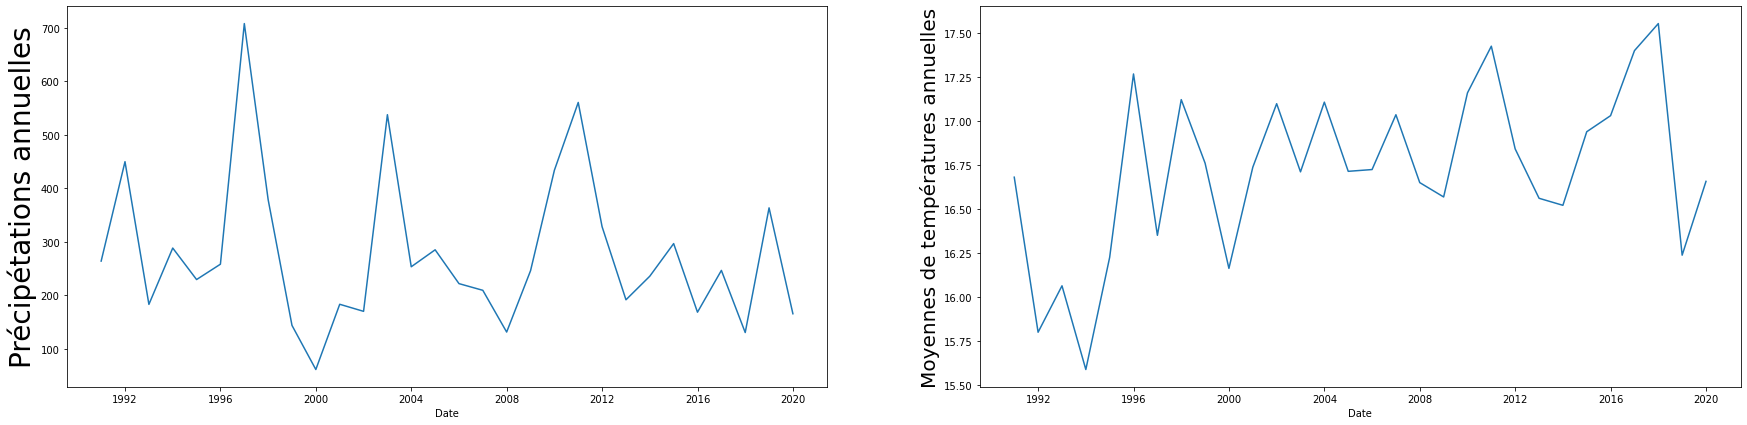

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Précipétations annuelles',fontsize=28)
plt.plot(yearlyData['prcp'])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Moyennes de températures annuelles',fontsize=20)
plt.plot(yearlyData[['tavg']])

plt.show()

In [ ]:
 print(yearlyData.iloc[6])

prcp    707.500000
tavg     16.349408
Name: 1996-12-31 00:00:00, dtype: float64


!!  Same as in https://meteostat.net/fr/place/MA-ESIT?t=1996-01-01/1996-12-31

## 2. Temperatures 

### 2.1 Importation et exploration

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import pyplot
import statsmodels 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics

In [ ]:
temperature = monthlyData[['tavg']].copy()
temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    372 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


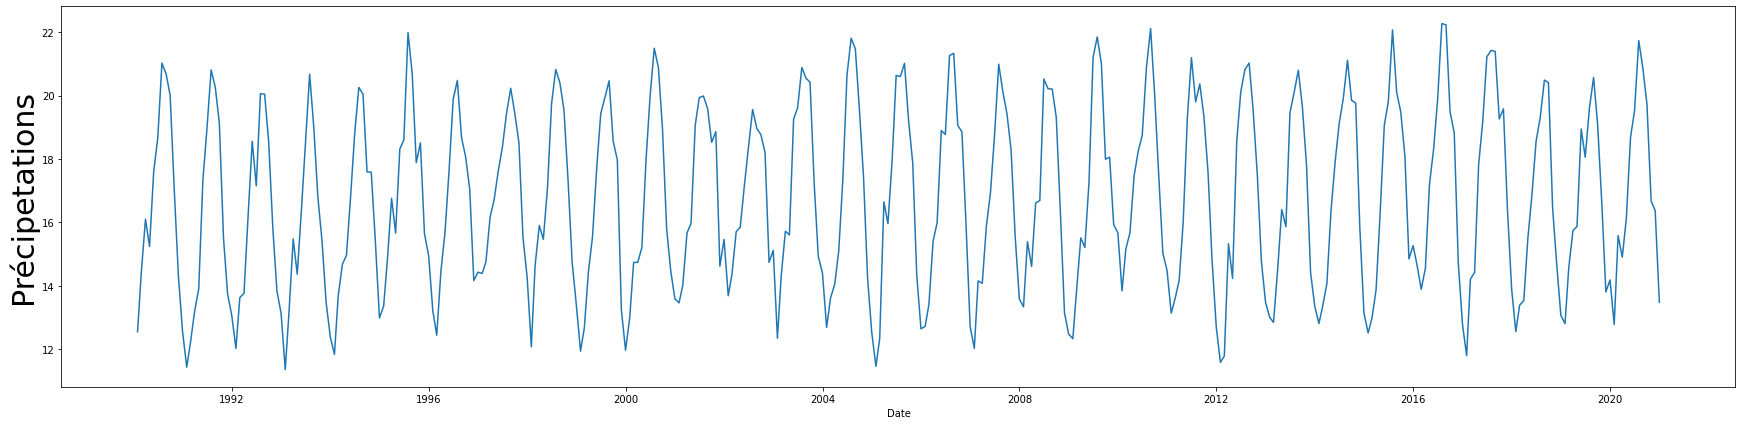

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=30)
plt.plot(temperature)
plt.show()

### 2.2 Stationnarité

#### Par observation

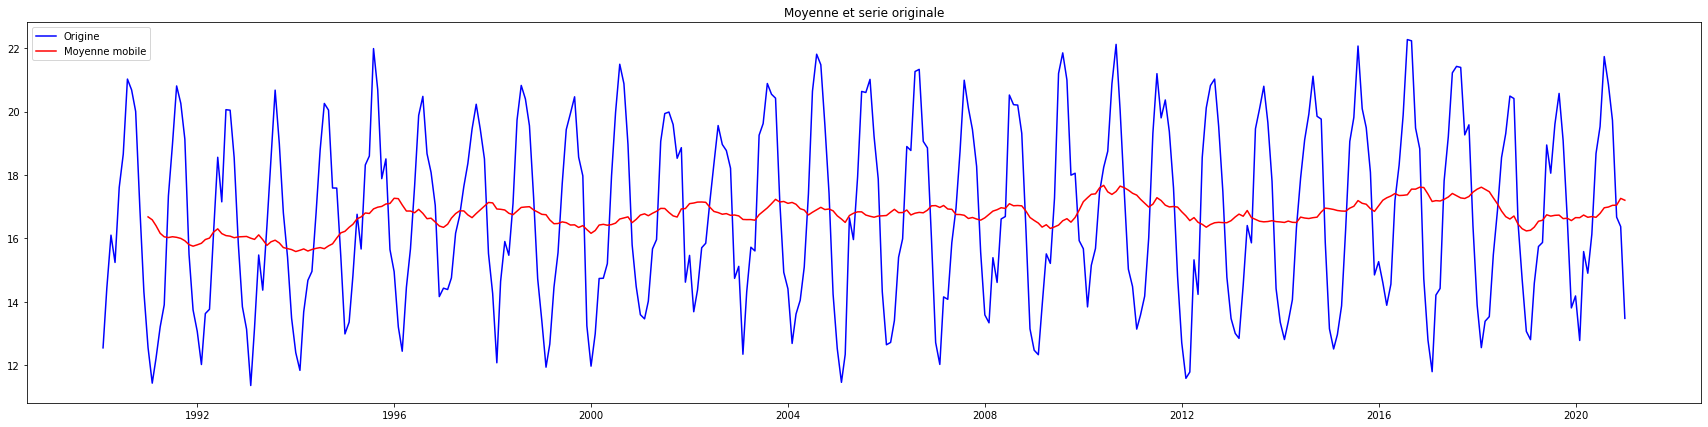

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
rolling_mean = temperature.rolling(window = 12).mean()
plt.plot(temperature, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et serie originale')
plt.show()

✔ Le  moyen mobile est quasi- constante donc on peut estimer que notre série de données est stationnaires

#### Par test de Dickey Fuller

In [ ]:
result = adfuller(temperature['tavg'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -2.9745651525567984
p-value : 0.0373389380590868
Valeurs Critiques :
	1%: -3.448645946352023
	5%: -2.869602139060357
	10%: -2.5710650077160495


✔ La p-value est inférieure au seuil de 0,05 et la statistique ADF est proche des valeurs critiques. Par conséquent, la série temporelle est bel et bien stationnaire.<br>

### 2.3 Application du modèle SARIMA (Seasonal Autoregressive Integrated Moving Averages)

#### Importation du package

In [ ]:
#import pmdarima

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#### 2.3.1 Saisonalité

✔ Le modèle est additif , on procède alors à la décompsition pour observer la saisonalité

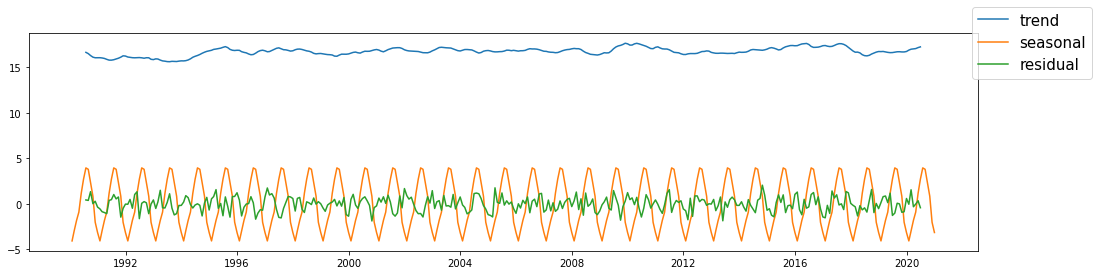

In [ ]:
result = seasonal_decompose(temperature['tavg'],model='add')
fig, ax =plt.subplots(figsize=(17, 4))
plt.plot(result.trend, label='trend');
plt.plot(result.seasonal, label='seasonal');
plt.plot(result.resid, label='residual');
fig.legend(fontsize=15)

<font size=4>✔ y(t)  =  Trend(t) + Seasonality(t) + Residual(t) </font> <br>
✔ d'après la decompisition on constate clairement la présence d'une saisonalité 

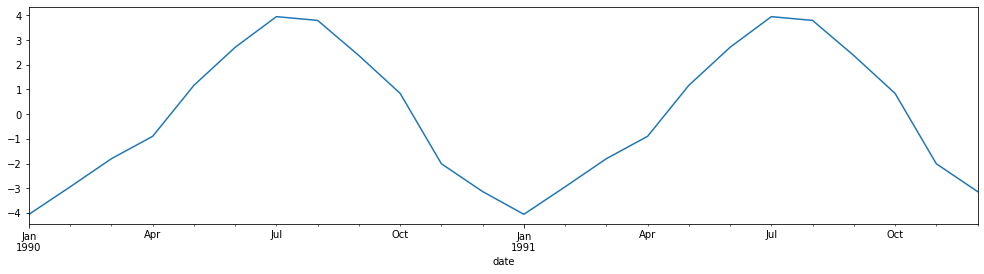

In [ ]:
fig, ax =plt.subplots(figsize=(17, 4))

result.seasonal.iloc[0:24].plot()

✔ une saisonalité d'une année = 12 mois
<br>
✔ On doit donc choisir le modèle SARIMA qui est compatibe avec ce type de séries

#### 2.3.2 On cherche les ordres du modèle SARIMA

In [ ]:
auto_arima(temperature['tavg'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  372
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -499.373
Date:                              Fri, 18 Mar 2022   AIC                           1016.745
Time:                                      15:33:21   BIC                           1052.015
Sample:                                           0   HQIC                          1030.752
                                              - 372                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2648      0.163      1.620      0.105      -0.055       0.585
ar.L1         -1.8047      0.020    -88.624      0.000      -1.845      -1.765
ar.L2         -0.9748      0.020    -48.891      0.000      -1.014      -0.936
ma.L1          2.1438      0.059     36.559      0.000       2.029       2.259
ma.L2          1.6186      0.100     16.197      0.000       1.423       1.814
ma.L3          0.3562      0.055      6.516      0.000       0.249       0.463
ar.S.L12       0.9957      0.003    378.394      0.000       0.991       1.001
ma.S.L12      -0.8146      0.042    -19.172      0.000      -0.898      -0.731
sigma2         0.7837      0.066     11.929      0.000       0.655       0.913
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.57   Prob(JB):                         0.47
Heteroskedasticity (H):               1.08   Skew:                            -0.11
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* Intercep : the constant term <br>
* The ar.L1, ma.L2.... and ar.S.L12 are our lag variables <br>
* Sigma2 : error term <br>
* Sample : range of data <br>
* les termes significants ont une p-Value < 0.05 (we want each term to have a p-value of less than 0.05, so we can reject the null hypothesis with values that ARE statistically significant) <br>

* Ljung-Box : tester les erreurs s'ils sont des bruits blancs(here Since the probability is above 0.05, we can't reject the null that the errors are white noise.)

* Jarque-Bera tests for the normality of errors. It tests the null that the data is normally distributed against an alternative of another distribution


* Heteroscedasticity tests that the error residuals are homoscedastic or have the same variance

* Log-Likelihood, AIC, BIC, et HQIC sond des critères de performance

```
 https://analyzingalpha.com/blog/interpret-arima-results
 
```



✔ Donc on va modéliser cette série par un modèle SARIMA

### 2.4 Spliting data for testing

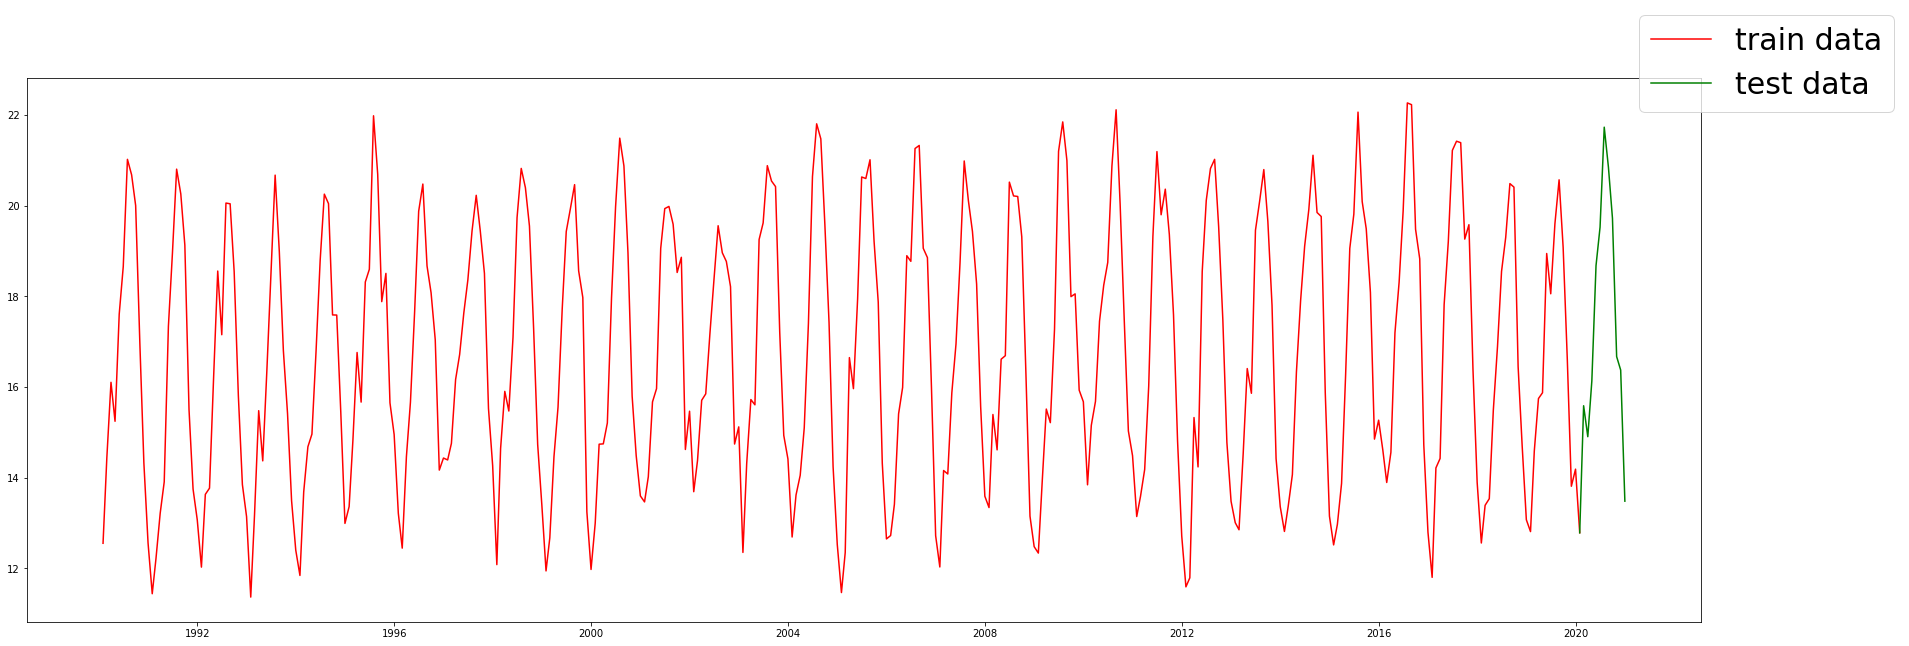

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
# Set one year for testing
train = temperature.iloc[:361]
valid = temperature.iloc[360:]
#preprocessing (since arima takes univariate series as input)
#train.drop('date',axis=1,inplace=True)
#valid.drop('date',axis=1,inplace=True)
 
#plotting the data
plt.plot(train['tavg'], color = 'red', label='train data') 
plt.plot(valid['tavg'], color = 'green', label ='test data')
fig.legend(fontsize=30)
plt. show()

In [ ]:
train.head()

,tavg
date,
1990-01-31,12.551613
1990-02-28,14.428571
1990-03-31,16.103226
1990-04-30,15.243333
1990-05-31,17.606452


#### Fiting the model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['tavg'],order=(2, 0, 3),seasonal_order=(1, 0, 2, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                    tavg   No. Observations:                  361
Model:             SARIMAX(2, 0, 3)x(1, 0, [1, 2], 12)   Log Likelihood                -488.465
Date:                                 Fri, 18 Mar 2022   AIC                            994.930
Time:                                         15:33:29   BIC                           1029.930
Sample:                                     01-31-1990   HQIC                          1008.845
                                          - 01-31-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0480      0.338      0.142      0.887      -0.615       0.711
ar.L2          0.9504      0.341      2.787      0.005       0.282       1.619
ma.L1          0.2822      0.354      0.798      0.425      -0.411       0.975
ma.L2         -0.9483      0.216     -4.399      0.000      -1.371      -0.526
ma.L3         -0.2903      0.131     -2.211      0.027      -0.548      -0.033
ar.S.L12       0.9983      0.002    575.501      0.000       0.995       1.002
ma.S.L12      -0.8381      0.062    -13.460      0.000      -0.960      -0.716
ma.S.L24      -0.0370      0.059     -0.625      0.532      -0.153       0.079
sigma2         0.7818      0.070     11.148      0.000       0.644       0.919
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.33   Prob(JB):                         0.42
Heteroskedasticity (H):               1.07   Skew:                            -0.04
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Testing 

In [ ]:
start=len(train)-1
end=len(train)+len(valid)-2
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,3)(1,0,2,12) Predictions')

In [ ]:
predictions.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SARIMA(1,0,3)(1,0,2,12) Predictions  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [ ]:
for i in range(0,len(predictions)):
    print('Value =', round (predictions[i],3),'  ;  Expected =', round(valid.values[i][0],3),'      Expected- value =', round(-predictions[i]+valid.values[i][0],2))

Value = 13.103   ;  Expected = 12.784       Expected- value = -0.32
Value = 13.763   ;  Expected = 15.586       Expected- value = 1.82
Value = 14.842   ;  Expected = 14.903       Expected- value = 0.06
Value = 16.18   ;  Expected = 16.133       Expected- value = -0.05
Value = 18.141   ;  Expected = 18.677       Expected- value = 0.54
Value = 19.469   ;  Expected = 19.527       Expected- value = 0.06
Value = 20.572   ;  Expected = 21.732       Expected- value = 1.16
Value = 20.796   ;  Expected = 20.852       Expected- value = 0.06
Value = 19.395   ;  Expected = 19.723       Expected- value = 0.33
Value = 17.778   ;  Expected = 16.671       Expected- value = -1.11
Value = 14.866   ;  Expected = 16.373       Expected- value = 1.51
Value = 13.766   ;  Expected = 13.481       Expected- value = -0.28


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

<b>✔ </b> Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

<b>✔ </b>The formula for the mean squared error is<br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

<b>✔ </b>The formula for the root mean squared error is<br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

<b>✔ </b>The advantage of the RMSE is that it is expressed in the same units as the data.<br>

In [ ]:
error = mean_squared_error(valid['tavg'],predictions)
print('MSE error =', error)

MSE error = 0.7296541900082874


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(valid['tavg'], predictions)
print('RMSE Error: ', error)

RMSE Error:  0.8541979805690759


✔ Des erreures RMSE et MSE faibles donc notre modèle est fiable

#### On compare les prédictions avec lesdonnées oroginelles

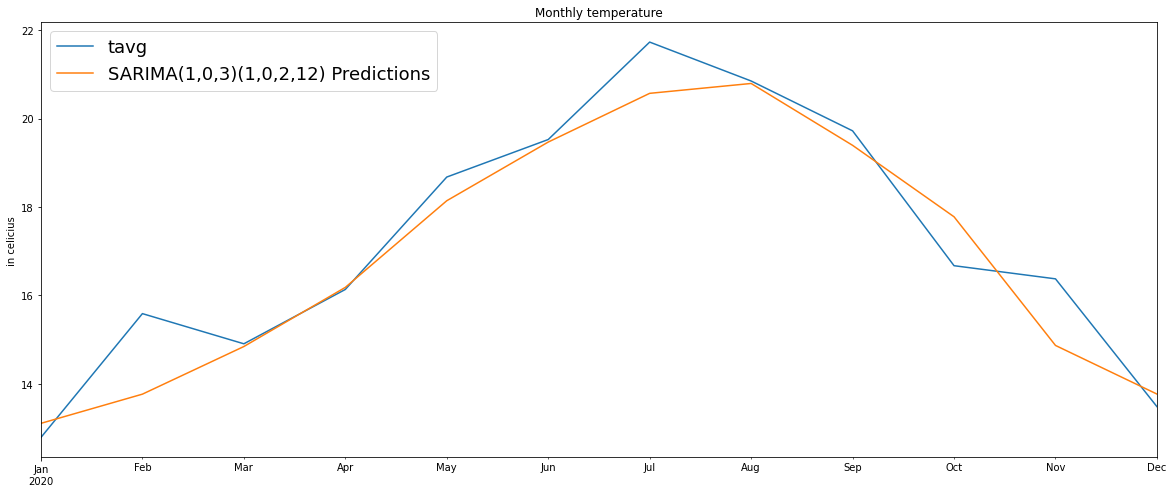

In [ ]:
title = 'Monthly temperature'
ylabel='in celicius'
xlabel=''

ax = valid['tavg'].plot(legend=True,figsize=(20,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.legend(fontsize=18)

### 2.5 Retrain the model on the full data, and forecast the future

In [ ]:
model = SARIMAX(temperature['tavg'],order=(1, 0, 3),seasonal_order=(1, 0, 2, 12))
results = model.fit()
fcast = results.predict(len(temperature),len(temperature)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

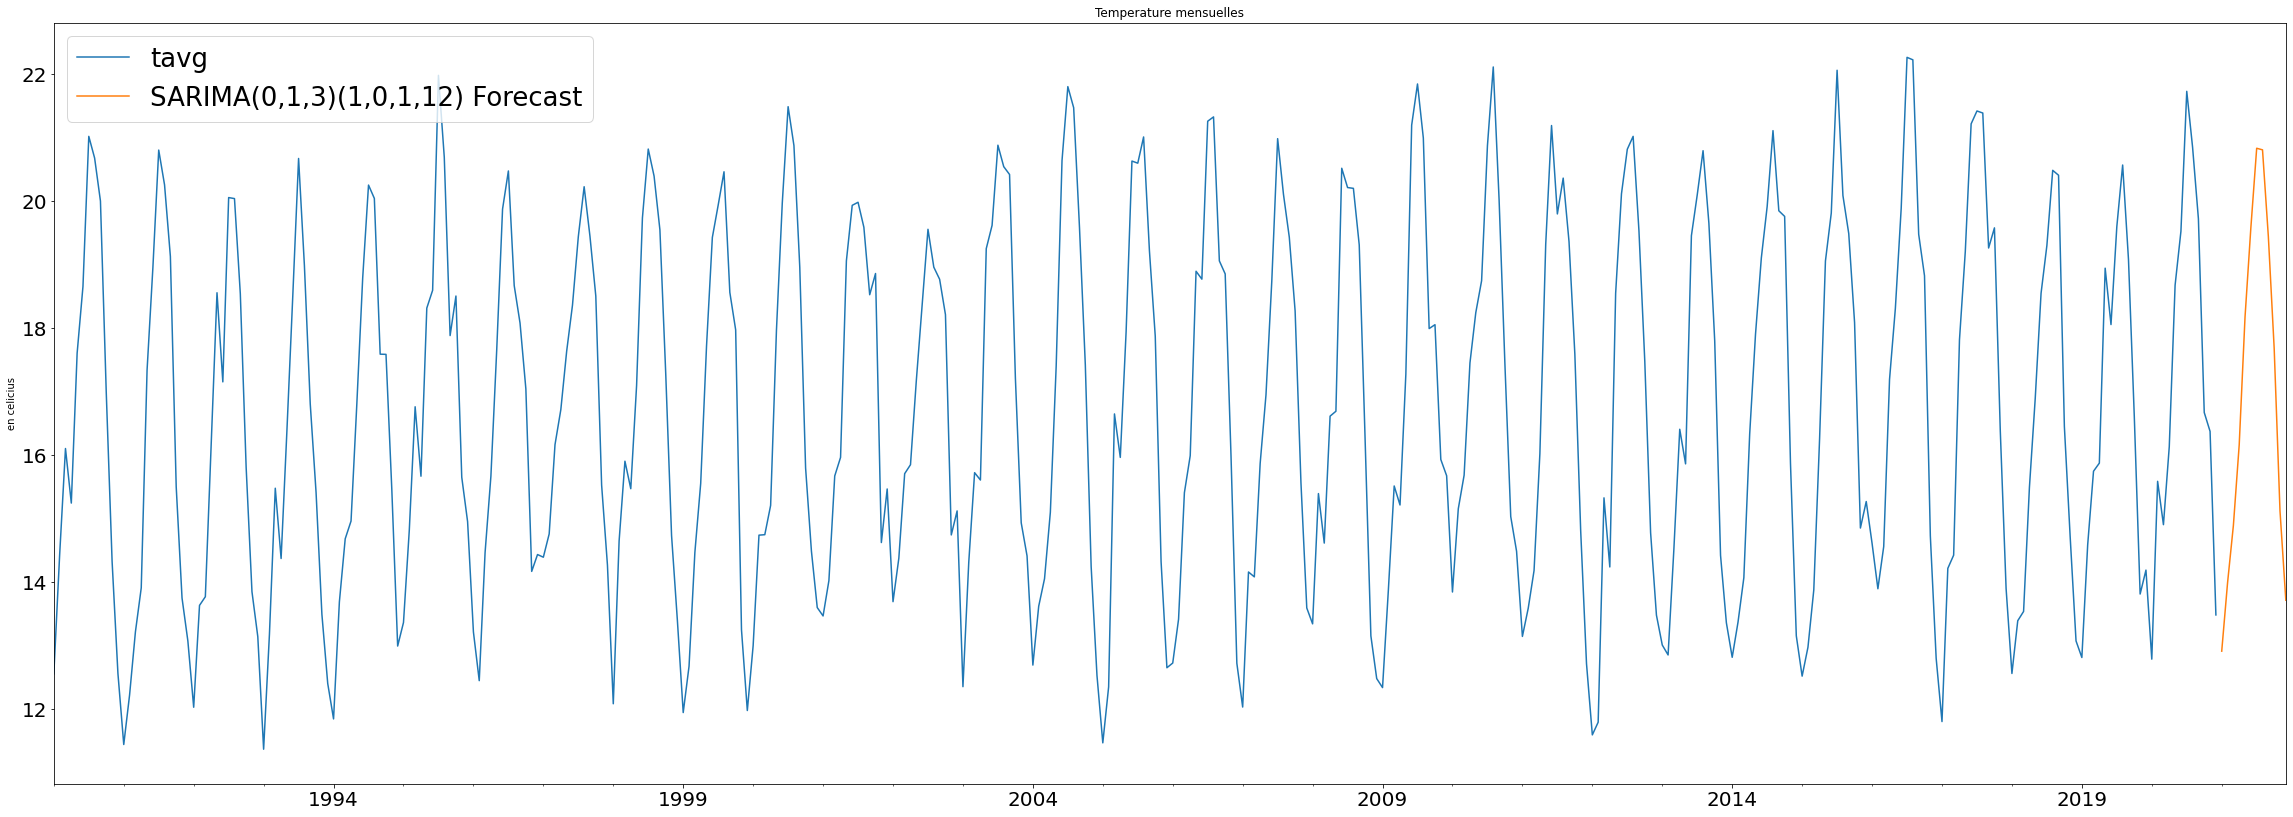

In [ ]:
# Plot predictions against known values
title = 'Temperature mensuelles'
ylabel='en celicius'
xlabel=''

ax = temperature['tavg'].plot(legend=True,figsize=(40,14),title=title)
fcast.plot(legend=True,fontsize=20)
ax.autoscale(axis='x',tight=True)
plt.legend(fontsize=26)
ax.set(xlabel=xlabel, ylabel=ylabel);

✔  Et voici nous prédictions de l'année 2021 :

In [ ]:
fcast.head(12)

2021-01-31    12.909440
2021-02-28    13.984840
2021-03-31    14.888966
2021-04-30    16.160121
2021-05-31    18.176299
2021-06-30    19.582294
2021-07-31    20.835182
2021-08-31    20.810196
2021-09-30    19.445834
2021-10-31    17.685252
2021-11-30    15.120486
2021-12-31    13.712179
Freq: M, Name: SARIMA(0,1,3)(1,0,1,12) Forecast, dtype: float64

## 3. Précipétations

### 3.1  Exploring

In [ ]:
precipetation = monthlyData[['prcp']].copy()
precipetation

,prcp
date,
1990-01-31,31.1
1990-02-28,0.5
1990-03-31,13.0
1990-04-30,27.2
1990-05-31,7.1
...,...
2020-08-31,0.3
2020-09-30,8.2
2020-10-31,15.3


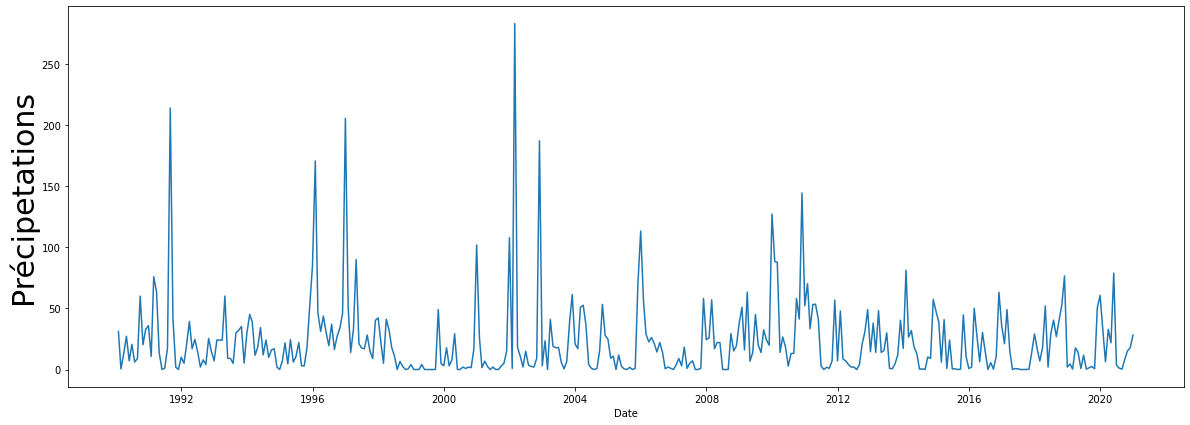

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.xlabel('Date')
plt.ylabel('Précipetations',fontsize=30)
plt.plot(precipetation[:])
plt.show()

#### Stationnarité

In [ ]:
result = adfuller(precipetation['prcp'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -4.476006403915321
p-value : 0.00021723006745049683
Valeurs Critiques :
	1%: -3.4485948978753314
	5%: -2.86957971128312
	10%: -2.571053050314224


<b>✔ </b> le test de Dickey fuller confirme que la série est stationnaire

#### Saisonalité

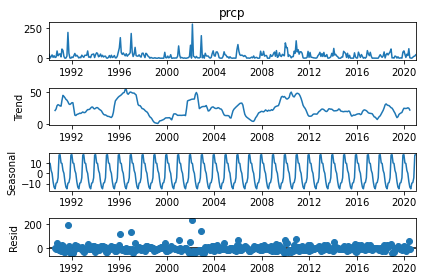

In [ ]:
result = seasonal_decompose(precipetation['prcp'],model='add')
result.plot();

✔ D'après la composante saisonière on peut supposer qu'il y'a saisonalité <br>
❌❗ Mais attention la composante <b>Residual</b> prend des valeurs très grandes( plus grandes que la <b>Trend</b> et <b>Seasonal</b> ensemble)
<br><b>➡</b> Donc la série ne présente pas une saisonnalité, on utulise donc ARIMA

In [ ]:
model = auto_arima(precipetation.prcp,test='adf',seasonal=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  372
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1806.144
Date:                Fri, 18 Mar 2022   AIC                           3620.287
Time:                        15:33:42   BIC                           3635.963
Sample:                             0   HQIC                          3626.512
                                - 372                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.2450      3.364      4.829      0.000       9.652      22.838
ar.L1          0.1871      0.046      4.036      0.000       0.096       0.278
ar.L2          0.1071      0.038      2.829      0.005       0.033       0.181
sigma2       965.2190     38.214     25.258      0.000     890.320    1040.118
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              7828.42
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             3.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

On va utuliser ARMA(2,0) qui est aussi ARIMA(2,0,0)

### 3.2  ARIMA

#### Spliting data for testing

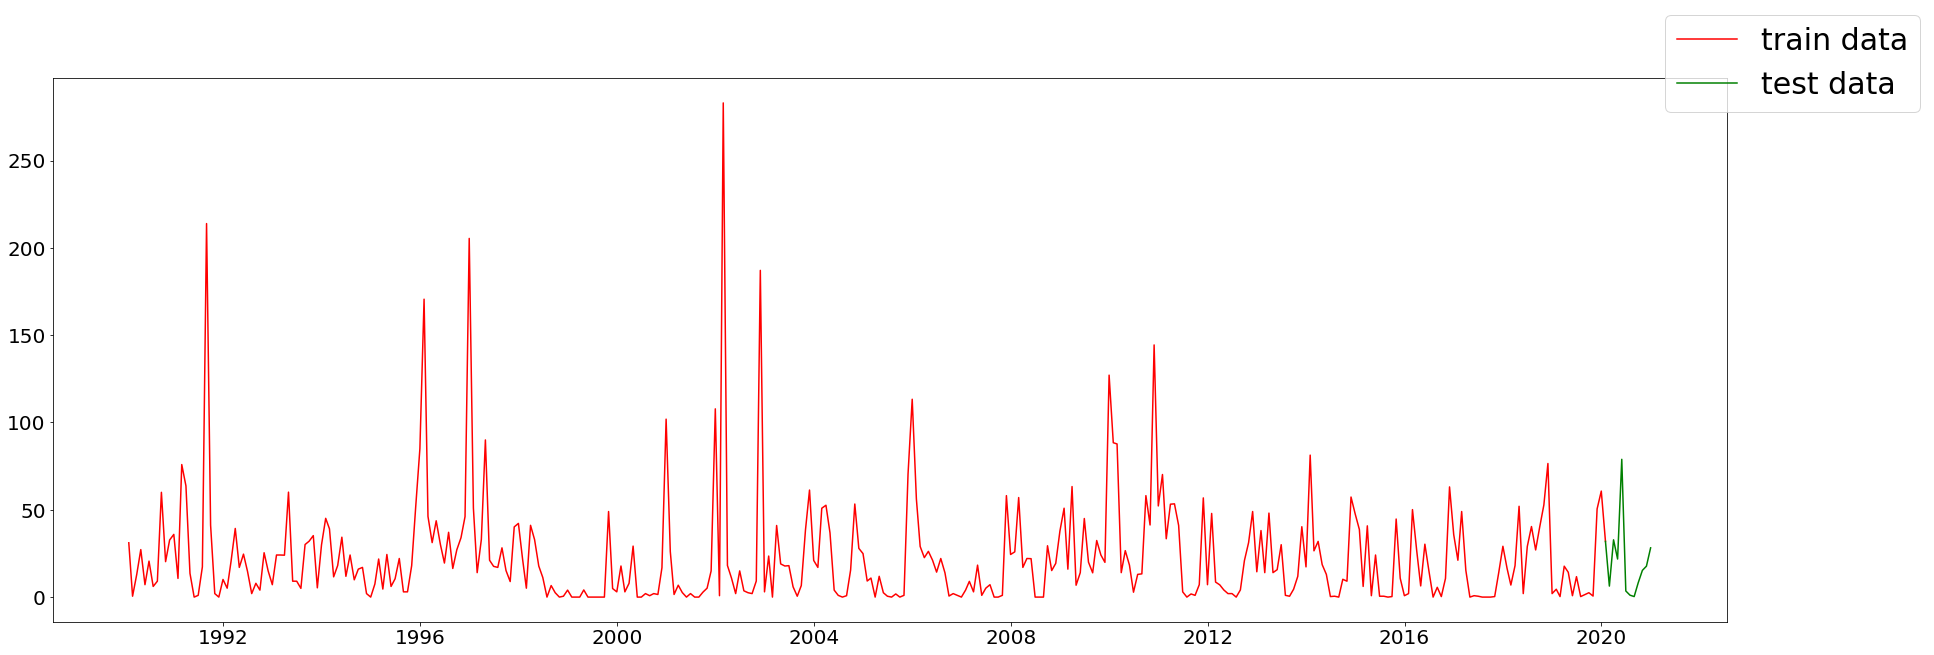

In [ ]:
train = precipetation.iloc[:361]
valid = precipetation.iloc[360:]
fig, ax = plt.subplots(figsize=(30, 10))

#plotting the data
plt.plot(train['prcp'], color = 'red', label='train data') 
plt.plot(valid['prcp'], color = 'green', label ='test data')
fig.legend(fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt. show()

In [ ]:
# Forecast
n_periods = 12
forecast, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_forecast = np.arange(len(precipetation.prcp), len(precipetation.prcp)+n_periods)

In [ ]:
for i in range(0,len(forecast)):
    print('Value =', round (forecast[i],3),'  ;  Expected =', round(valid.values[i][0],3) )

Value = 23.417   ;  Expected = 31.9
Value = 23.646   ;  Expected = 6.3
Value = 23.177   ;  Expected = 32.8
Value = 23.114   ;  Expected = 21.8
Value = 23.052   ;  Expected = 78.9
Value = 23.033   ;  Expected = 3.5
Value = 23.023   ;  Expected = 1.1
Value = 23.019   ;  Expected = 0.3
Value = 23.018   ;  Expected = 8.2
Value = 23.017   ;  Expected = 15.3
Value = 23.016   ;  Expected = 17.7
Value = 23.016   ;  Expected = 28.2


In [ ]:
prcp_series =pd.Series(precipetation['prcp'].values ,index=np.arange(0, len(precipetation.prcp+13)))

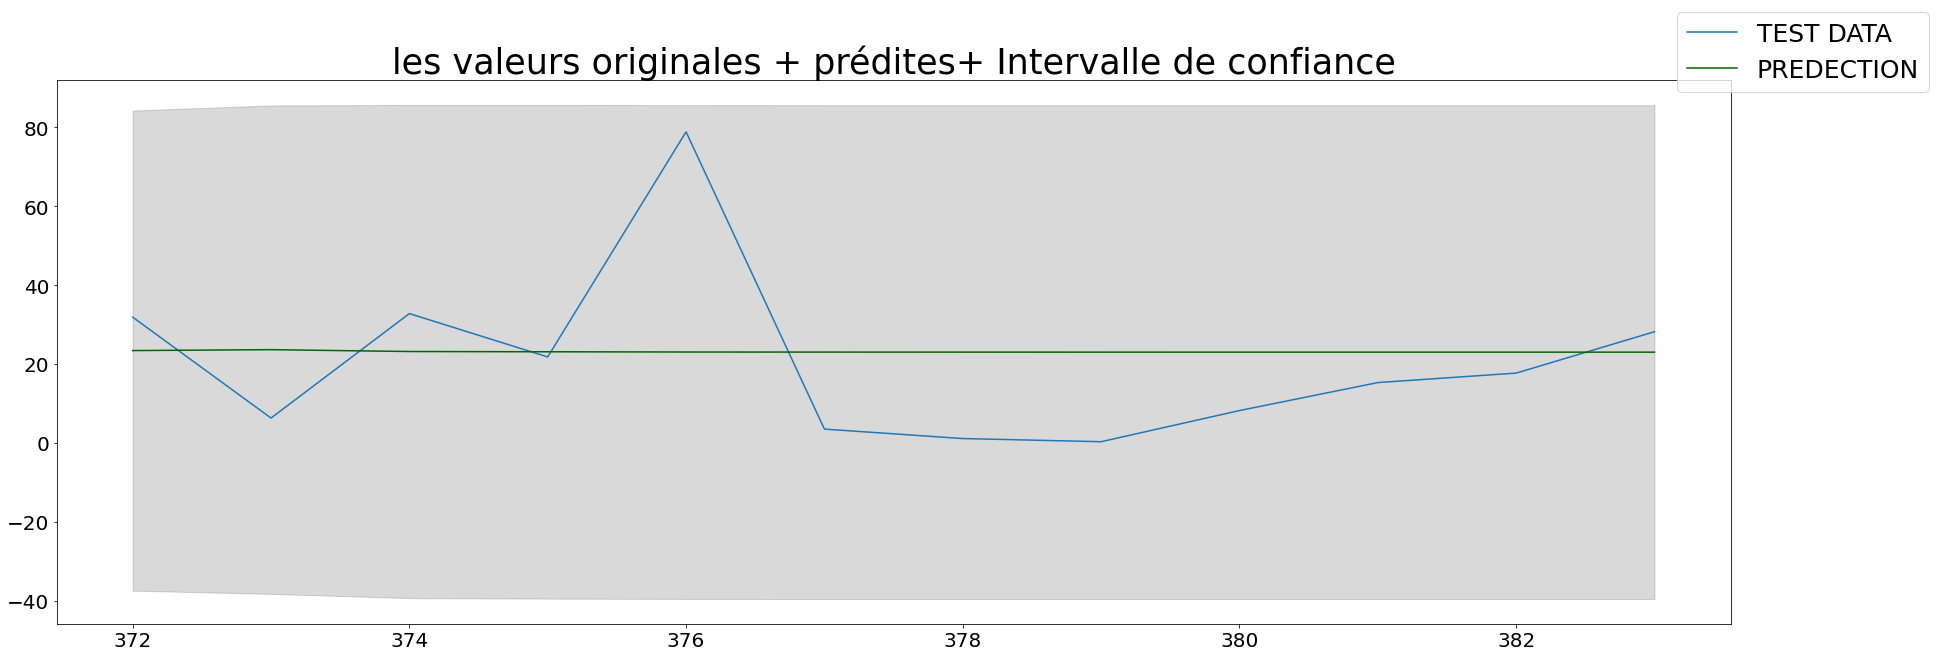

In [ ]:
# make series for plotting purpose
fc_series = pd.Series(forecast, index=index_of_forecast)
lower_series = pd.Series(confint[:, 0], index=index_of_forecast)
upper_series = pd.Series(confint[:, 1], index=index_of_forecast)
valid_series =pd.Series(valid['prcp'].values ,index=index_of_forecast)

# Plot
fig, ax = plt.subplots(figsize=(30, 10))
#plt.plot(prcp_series)
plt.plot(valid_series,label='TEST DATA')
plt.plot(fc_series, color='darkgreen',label='PREDECTION')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

fig.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("les valeurs originales + prédites+ Intervalle de confiance",fontsize=35)
plt.show()

In [ ]:
# error = rmse(valid['prcp'],forecast)
# print('RMSE Error: ', error)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=np.sqrt(mean_squared_error(valid['prcp'],forecast))
print(rmse)


21.013486828828583


#### Just preparing data for next step

In [ ]:
daily_prcp = data[['prcp']].copy()
daily_prcp.head()

,prcp
date,
1990-01-01,0.0
1990-02-01,0.5
1990-03-01,4.1
1990-04-01,13.0
1990-05-01,1.0


In [ ]:
daily_prcp=daily_prcp[(daily_prcp.prcp!=270) & (daily_prcp.prcp!=199.9)]
daily_prcp.max()

prcp    89.9
dtype: float64

In [ ]:
monthly=pd.DataFrame()
monthly['prcp']=daily_prcp['prcp'].resample('M').sum()
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 1990-01-31 to 2021-01-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    373 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


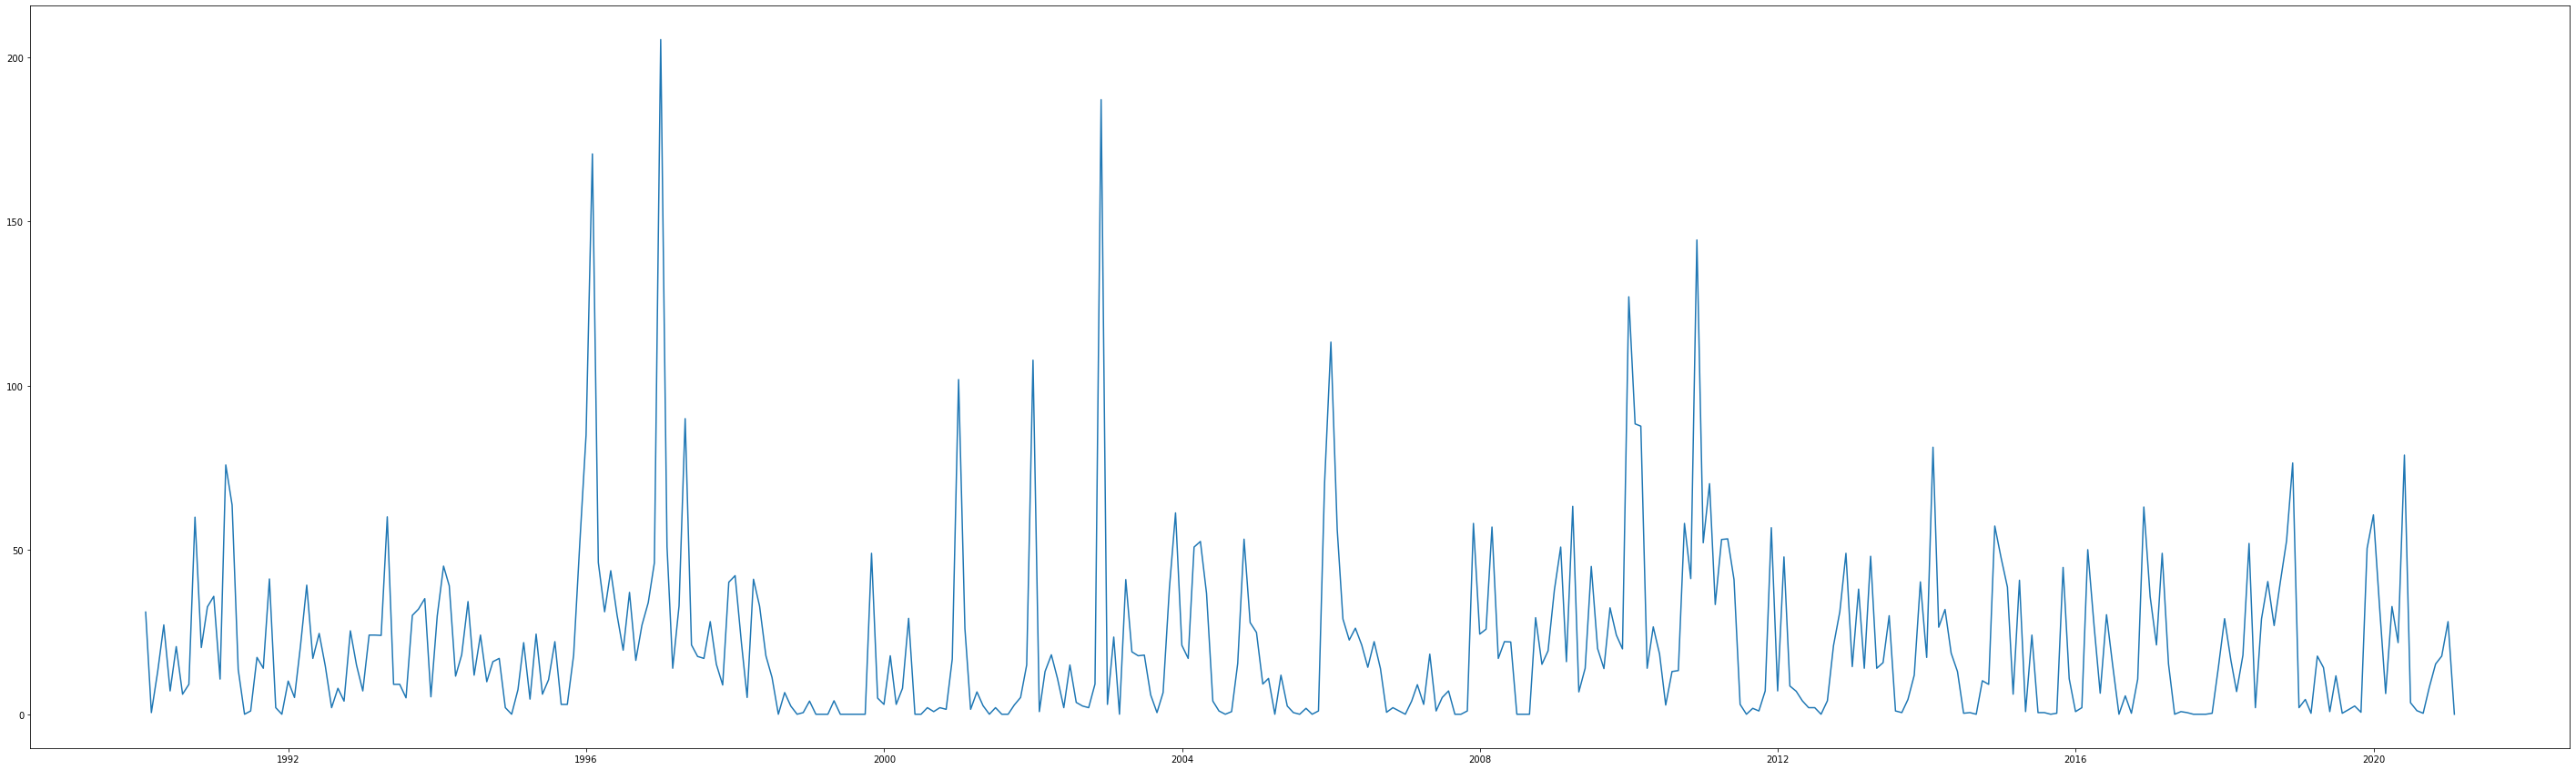

In [ ]:
ax, fig=plt.subplots(figsize=(50,15))
plt.plot(monthly)

In [ ]:
monthly.to_csv('prcp.csv')

### 3.3  LSTM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/prcp.csv',sep=',', parse_dates = ['date'], index_col = ['date'])

In [ ]:
len(df)

373

In [ ]:
train = df.iloc[:361]
test = df.iloc[361:]
print(train.shape)
print(test.shape)

(361, 1)
(12, 1)


##### Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100 , input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=400)

Epoch 1/400
349/349 [==============================] - 5s 8ms/step - loss: 0.0189
Epoch 2/400
349/349 [==============================] - 3s 9ms/step - loss: 0.0171
Epoch 3/400
349/349 [==============================] - 3s 9ms/step - loss: 0.0170
Epoch 4/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0167
Epoch 5/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0165
Epoch 6/400
349/349 [==============================] - 3s 10ms/step - loss: 0.0167
Epoch 7/400
349/349 [==============================] - 3s 9ms/step - loss: 0.0164
Epoch 8/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0163
Epoch 9/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0163
Epoch 10/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0162
Epoch 11/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0163
Epoch 12/400
349/349 [==============================] - 3s 8ms/step - loss: 0.0161
Epoch 13/400

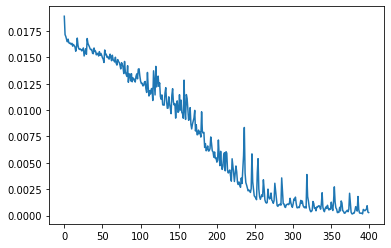

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.11808139]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.03067186])

In [ ]:
test_predictions = []
import numpy as np

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,prcp,Predictions
date,,
2020-02-29,6.3,24.253918
2020-03-31,32.8,28.156523
2020-04-30,21.8,21.109973
2020-05-31,78.9,12.085659
2020-06-30,3.5,19.238155
2020-07-31,1.1,18.520545
2020-08-31,0.3,13.236133
2020-09-30,8.2,4.400137
2020-10-31,15.3,17.446350


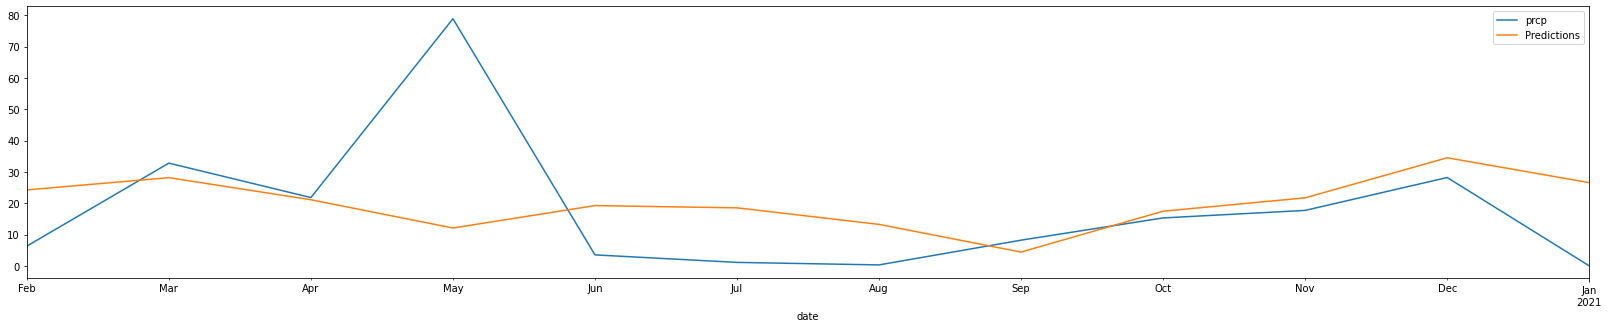

In [ ]:
test.plot(figsize=(28,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=np.sqrt(mean_squared_error(test['prcp'],test['Predictions']))
print(rmse)


22.92715251908091


In [ ]:
scaler.fit(df)
scaled= scaler.transform(df)
generator = TimeseriesGenerator(scaled, scaled, length=n_input, batch_size=1)
model.fit(generator,epochs=400)

Epoch 1/400
361/361 [==============================] - 4s 12ms/step - loss: 8.7289e-04
Epoch 2/400
361/361 [==============================] - 3s 8ms/step - loss: 0.0014
Epoch 3/400
361/361 [==============================] - 3s 8ms/step - loss: 8.7369e-04
Epoch 4/400
361/361 [==============================] - 3s 8ms/step - loss: 4.8580e-04
Epoch 5/400
361/361 [==============================] - 3s 8ms/step - loss: 2.8395e-04
Epoch 6/400
361/361 [==============================] - 4s 10ms/step - loss: 2.7831e-04
Epoch 7/400
361/361 [==============================] - 4s 12ms/step - loss: 3.2973e-04
Epoch 8/400
361/361 [==============================] - 3s 9ms/step - loss: 4.0942e-04
Epoch 9/400
361/361 [==============================] - 3s 8ms/step - loss: 2.6135e-04
Epoch 10/400
361/361 [==============================] - 3s 8ms/step - loss: 5.3602e-04
Epoch 11/400
361/361 [==============================] - 3s 8ms/step - loss: 9.8368e-04
Epoch 12/400
361/361 [==============================]

In [ ]:
predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(predictions)
true_predictions

array([[ 6.31381701],
       [32.96735905],
       [22.53684439],
       [79.64779825],
       [ 3.15078099],
       [ 2.21796578],
       [ 1.76175643],
       [10.16503426],
       [17.18719485],
       [20.11276658],
       [29.24599959],
       [ 0.65960501]])

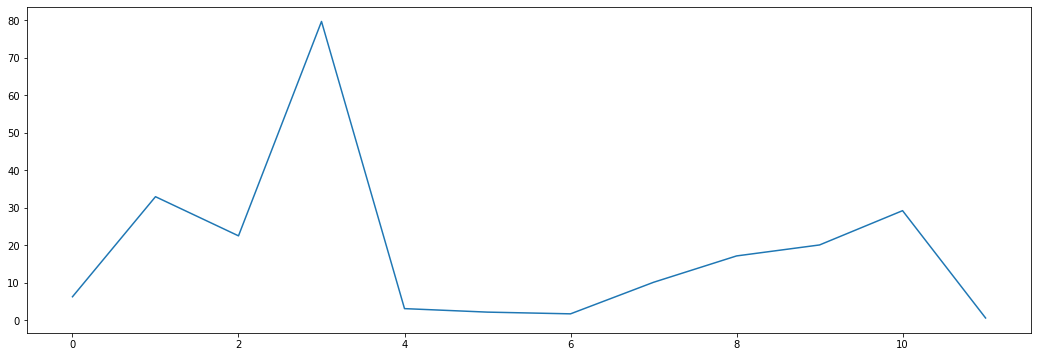

In [ ]:
ax, fig=plt.subplots(figsize=(18,6))
plt.plot(true_predictions)

## 4. Production de blé tendre

### 4.1 Vector autoregression

In [ ]:
#import required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
path="https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/bt.csv"
df = pd.read_csv(path, sep=';', index_col = ['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1990/1991 to 2019/2020
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  30 non-null     float64
 1   superficie  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0+ bytes


In [ ]:
path='https://raw.githubusercontent.com/Hamid-abdellaoui/crop-yield-predection/main/Daily%2030%20years.csv'
data = pd.read_csv(path, sep=';' , parse_dates = ['date'], index_col = ['date'])
data=data.drop(['tmax','tmin'], axis=1)
data['prcp'] = data['prcp'].fillna(0)
data.interpolate(method ='linear', axis=0, inplace=True)

In [ ]:
monthlyData=pd.DataFrame()
monthlyData['prcp']=data['prcp'].resample('M').sum()
monthlyData['tavg']=data['tavg'].resample('M').mean()
monthlyData.drop(monthlyData.tail(1).index,inplace=True)
monthlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1990-01-31 to 2020-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    372 non-null    float64
 1   tavg    372 non-null    float64
dtypes: float64(2)
memory usage: 8.7 KB


In [ ]:
monthlyData.loc[monthlyData.index.month == 5 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 6 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 7 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 8 , ['prcp']] = 0
monthlyData.loc[monthlyData.index.month == 9 , ['prcp']] = 0

In [ ]:
yearlyData=pd.DataFrame()
yearlyData['prcp']=monthlyData['prcp'][5:365].resample('12M').sum()
yearlyData['tavg']=monthlyData['tavg'][5:365].resample('12M').mean()
yearlyData.drop(yearlyData.head(1).index,inplace=True)
yearlyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 1991-06-30 to 2020-06-30
Freq: 12M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    30 non-null     float64
 1   tavg    30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [ ]:
df.index=yearlyData.index  
df['precipetations']=yearlyData.prcp
df['temperatures']=yearlyData.tavg
df['ratio'] = df['production']/df['superficie']
df.head()

,production,superficie,precipetations,temperatures,ratio
date,,,,,
1991-06-30,200280.0,86700,252.8,16.043699,2.310035
1992-06-30,38350.0,79900,94.1,16.152066,0.479975
1993-06-30,97300.0,61200,179.8,15.893268,1.589869
1994-06-30,204400.0,102200,184.3,15.711569,2.000000
1995-06-30,9570.0,63800,77.3,16.786741,0.150000


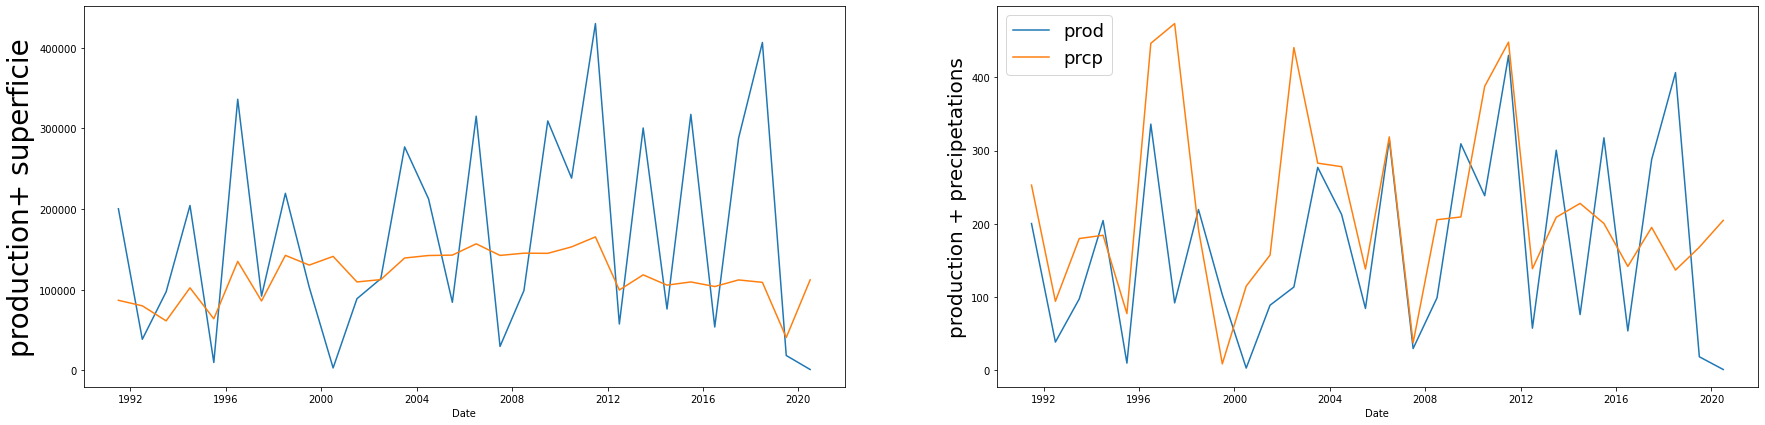

In [ ]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('production+ superficie',fontsize=28)
plt.plot(df['production'])
plt.plot(df['superficie'])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('production + precipetations',fontsize=20)
plt.plot(df['production']/1000, label='prod')
plt.plot(df['precipetations'], label='prcp')
plt.legend(fontsize=18)

plt.show()

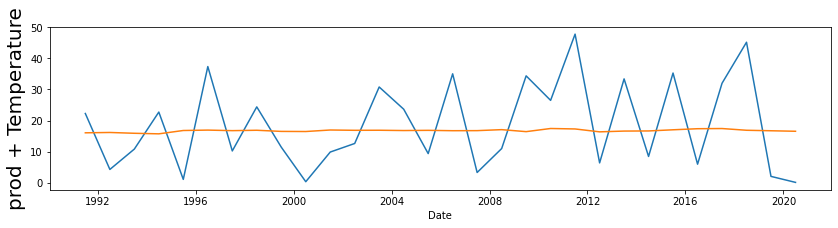

In [ ]:
fig, ax = plt.subplots(figsize=(14, 3))
plt.xlabel('Date')
plt.ylabel('prod + Temperature',fontsize=20)
plt.plot(df['production']/9000)
plt.plot(df['temperatures'])

In [ ]:
# VAR example
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random
# contrived dataset with dependency
data = list()
for i in range(30):
  v0 = df.index[i].year
  v1 = df['precipetations'][i]
  v2 = df['production'][i]
  row = [v0, v1, v2]
  data.append(row)
data

[[1991, 252.8, 200280.0],
 [1992, 94.1, 38350.0],
 [1993, 179.8, 97300.0],
 [1994, 184.3, 204400.0],
 [1995, 77.3, 9570.0],
 [1996, 446.5, 336150.0],
 [1997, 473.5, 91910.0],
 [1998, 192.1, 219450.0],
 [1999, 8.6, 103020.0],
 [2000, 114.80000000000001, 2820.0],
 [2001, 157.20000000000002, 88700.0],
 [2002, 440.7, 113520.0],
 [2003, 282.79999999999995, 277030.0],
 [2004, 278.0, 212648.3874],
 [2005, 138.1, 84252.0],
 [2006, 318.70000000000005, 315168.0],
 [2007, 37.3, 29498.5],
 [2008, 205.5, 98812.3867],
 [2009, 209.3, 309244.4],
 [2010, 387.8, 238312.035],
 [2011, 448.1, 430040.0],
 [2012, 138.6, 57312.252],
 [2013, 208.9, 300482.0],
 [2014, 227.8, 75921.1884],
 [2015, 200.4, 317407.65],
 [2016, 141.70000000000002, 53592.0],
 [2017, 195.0, 287840.0],
 [2018, 136.7, 406570.0],
 [2019, 168.0, 18252.0],
 [2020, 204.6, 873.6]]

In [ ]:

data = pd.DataFrame (data, columns = ['year','prcp','prod'])
data.head()

,year,prcp,prod
0,1991,252.8,200280.0
1,1992,94.1,38350.0
2,1993,179.8,97300.0
3,1994,184.3,204400.0
4,1995,77.3,9570.0


In [ ]:
model = VAR(data)
for i in [1,2,3,4,5,6,7,8]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -13.46483099230796
BIC :  -12.89905340748597
FPE :  1.4275912287393846e-06
HQIC:  -13.287636511276364 

Lag Order = 2
AIC :  -13.324495162954616
BIC :  -12.325341780323214
FPE :  1.687912007079514e-06
HQIC:  -13.01904401291761 

Lag Order = 3
AIC :  -11.620508291463505
BIC :  -10.180689551458695
FPE :  1.0033141366960173e-05
HQIC:  -11.192374699719485 

Lag Order = 4
AIC :  -13.245569592346925
BIC :  -11.358424785314703
FPE :  2.376854159464285e-06
HQIC:  -12.702140169918554 

Lag Order = 5
AIC :  -8.653475114616224
BIC :  -6.3132335308692795
FPE :  0.0003546310351742543
HQIC:  -8.00439155920993 

Lag Order = 6
AIC :  -12.645453803072904
BIC :  -9.847575955996533
FPE :  1.7731511450888517e-05
HQIC:  -11.903176022641803 

Lag Order = 7
AIC :  -10.041957944637211
BIC :  -6.783583238057911
FPE :  0.012764327534279028
HQIC:  -9.222485838945477 

Lag Order = 8
AIC :  -10.271592176259217
BIC :  -6.55212926708314
FPE :  -0.00014552421554833372
HQIC:  -9.395398556520018 



In [ ]:
x = model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,37.01,37.15,1.180e+16,37.05
1,-16.14*,-15.55*,9.847e-08*,-15.99*
2,-11.83,-10.79,7.710e-06,-11.55
3,-12.79,-11.32,3.283e-06,-12.40
4,-9.882,-7.968,7.537e-05,-9.374
5,-9.941,-7.584,0.0001103,-9.315
6,-12.65,-9.848,1.773e-05,-11.90


In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 18, Mar, 2022
Time:                     19:26:30
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.3584
Nobs:                     26.0000    HQIC:                  -12.7021
Log likelihood:           100.515    FPE:                2.37685e-06
AIC:                     -13.2456    Det(Omega_mle):     7.04253e-07
--------------------------------------------------------------------
Results for equation year
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.416667         0.000006        71071.292           0.000
L1.year         0.875000         0.000002       532465.854           0.000
L1.prcp         0.000000         0.000000            1.188           0.235
L1.prod   

In [ ]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = data.values[-lag_order:]
forecast_input

4


array([[2.0170e+03, 1.9500e+02, 2.8784e+05],
       [2.0180e+03, 1.3670e+02, 4.0657e+05],
       [2.0190e+03, 1.6800e+02, 1.8252e+04],
       [2.0200e+03, 2.0460e+02, 8.7360e+02]])

In [ ]:
# Forecast
nobs=1
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=data.columns)
df_forecast

,year,prcp,prod
date,,,
2020-06-30,2021.0,217.363221,369752.536024


### 4.2 Multiple linear regression

In [ ]:
pd.DataFrame(df[['precipetations','production']][:21]).corr()

,precipetations,production
precipetations,1.000000,0.623147
production,0.623147,1.000000


les  paramètres precipetations et production sont correlés (paramètre precipetations un peu près de 63% du variable production)

In [ ]:
X = df[['precipetations', 'temperatures']][:21]
y = df['production'][:21]

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression(normalize=False)
regr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [ ]:
#testing (eg: 2010)
predicted = regr.predict([[387.5, 17.8]])
print(predicted[0])

248518.3763946638


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


la vrai valeur est : 238312.035 tonnes 

In [ ]:
# les predictions pour 2021
predicted = regr.predict([[329.5, 17]])
print(predicted[0])

217087.30373031623


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


* Data from [Metestat](meteostat.net). <br>
* For references and more details are [here](https://github.com/Hamid-abdellaoui/Crop-yield-predection).

<!-- 
## BONUS: how to train a model from A to Z
<img src="https://raw.githubusercontent.com/Hamid-abdellaoui/Crop-yield-prediction/main/Comment%20trainer%20un%20mod%C3%A8le%20de%20A%20a%20Z.png"> -->


#  <center> **END**  </center>

Next two codes are used to validate the previous results

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=8
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


grangers_causation_matrix(data, variables = ['prcp','prod']) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=0.6446  , p=0.4291  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=25, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=1.1924  , p=0.3202  , df_denom=25, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=23, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=2.0742  , p=0.1315  , df_denom=23, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=-0.0000 , p=1.0000  , df_d

,prcp_x,prod_x
prcp_y,1.0000,0.1848
prod_y,0.0152,1.0000


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
year   ::  23.25     > 24.2761   =>   False
prcp   ::  8.77      > 12.3212   =>   False
prod   ::  0.0       > 4.1296    =>   False


malheureusement the results have a weak significance !